In [1]:
%matplotlib inline

Extract histogram features
==========================

This example shows how to extract histogram features from tissue image.

Histogram features give a more detailed view than summary features
(`auto_examples_image_compute_summary_features.py`) by
computing a histogram of each image channel and returning bin-counts for
each Visium spot.

In addition to `feature_name` and `channels` we can specify the
following `features_kwargs`:

> -   `bins` - number of bins of the histogram, default is 10.
> -   `v_range` - range on which values are binned, default is the whole
>     image range.

::: {seealso}

    See `auto_examples_image_compute_features.py` for general usage
    of `squidpy.im.calculate_image_features`.
    
:::


In [3]:
import squidpy as sq

Lets load the fluorescence Visium dataset and calculate bin-counts (3
bins) of channels 0 and 1.


In [4]:
# get spatial dataset including high-resolution tissue image
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

# calculate histogram features and save in key "histogram_features"
sq.im.calculate_image_features(
    adata,
    img,
    features="histogram",
    features_kwargs={"histogram": {"bins": 3, "channels": [0, 1]}},
    key_added="histogram_features",
)

  0%|          | 0/704 [00:00<?, ?/s]

The result is stored in `adata.obsm['histogram_features']`.


In [5]:
adata.obsm["histogram_features"].head()

,histogram_ch-0_bin-0,histogram_ch-0_bin-1,histogram_ch-0_bin-2,histogram_ch-1_bin-0,histogram_ch-1_bin-1,histogram_ch-1_bin-2
AAACGAGACGGTTGAT-1,28201,1649,2191,32041,0,0
AAAGGGATGTAGCAAG-1,30072,748,1221,31510,529,2
AAATGGCATGTCTTGT-1,29032,2252,757,30793,1002,246
AAATGGTCAATGTGCC-1,28672,2411,958,32041,0,0
AAATTAACGGGTAGCT-1,29996,1116,929,31367,674,0


Use `squidpy.pl.extract` to plot the histogram features on the tissue
image or have a look at [our interactive visualisation
tutorial](../../tutorials/tutorial_napari.ipynb) to learn how to use our
interactive `napari` plugin. With these features we can e.g. appreciate
the detailed distribution of intensity values of channel 0 (DAPI stain)
on the different bins.


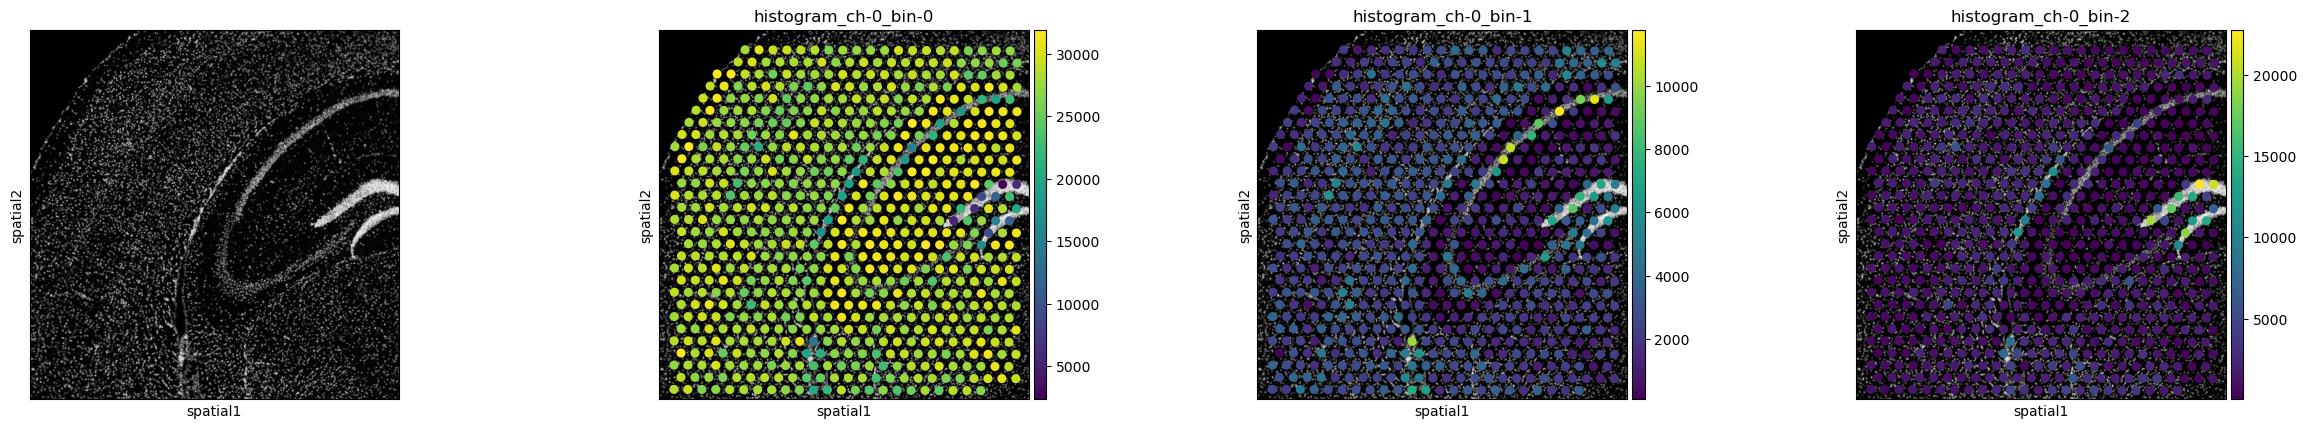

In [6]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "histogram_features"),
    color=[None, "histogram_ch-0_bin-0", "histogram_ch-0_bin-1", "histogram_ch-0_bin-2"],
    img_cmap="gray",
)